In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from scipy import stats
import os
import model_evaluation_utils as meu
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.preprocessing import get_feature_names
from collections import Counter

%matplotlib inline
import pickle
import h2o


**Note**: 
- Due to limited time, we only explored briefly the Random forest Algorithm using H20 framework.
- We recommend to go directly to the next Notebook 4Models_Comparison_ROC_Final to see the modelling comparison.

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.171-b11, mixed mode)
  Starting server from C:\Users\mstre\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\mstre\AppData\Local\Temp\tmp17d_c6bx
  JVM stdout: C:\Users\mstre\AppData\Local\Temp\tmp17d_c6bx\h2o_mstre_started_from_python.out
  JVM stderr: C:\Users\mstre\AppData\Local\Temp\tmp17d_c6bx\h2o_mstre_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Europe/Berlin
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,"7 days, 19 hours and 46 minutes"
H2O cluster name:,H2O_from_python_mstre_it1s05
H2O cluster total nodes:,1
H2O cluster free memory:,3.539 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [4]:
h2o.remove_all() 

In [10]:
#help(h2o)
#help(H2OGradientBoostingEstimator)
#help(h2o.import_file)

In [7]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [ ]:
covtype_df = h2o.import_file(os.path.realpath("../data/covtype.full.csv"))

In [12]:
cwd = os.getcwd()
cwd

'C:\\Users\\mstre\\Dropbox\\0Big_data\\Other_proj\\05 Data Science Interview'

In [16]:
stroke_pred1  = h2o.import_file('stroke_pred.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [17]:
# Split data into train and testing
train, test = stroke_pred1.split_frame(ratios=[0.8])

In [19]:
#Prepare predictors and response columns
stroke_pred1_X = stroke_pred1.col_names[:-1]     #last column is Cover_Type, our desired response variable 
stroke_pred1_y = stroke_pred1.col_names[-1]

In [20]:
help(H2ORandomForestEstimator)


Help on class H2ORandomForestEstimator in module h2o.estimators.random_forest:

class H2ORandomForestEstimator(h2o.estimators.estimator_base.H2OEstimator)
 |  Distributed Random Forest
 |  
 |  Method resolution order:
 |      H2ORandomForestEstimator
 |      h2o.estimators.estimator_base.H2OEstimator
 |      h2o.model.model_base.ModelBase
 |      h2o.utils.backward_compatibility.BackwardsCompatibleBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, **kwargs)
 |      Construct a new model instance.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  balance_classes
 |      Balance training data class counts via over/under-sampling (for imbalanced data).
 |      
 |      Type: ``bool``  (default: ``False``).
 |  
 |  binomial_double_trees
 |      For binary classification: Build 2x as many trees (one per class) - can lead to higher accuracy.
 |      
 |      Type: ``bool``  (default: 

In [23]:
# ### Random Forest
# We build our first model with the following parameters
# 
# **model_id:** Not required, but allows us to easily find our model in the [Flow](http://localhost:54321/) interface  
# **ntrees:** Maximum number of trees used by the random forest. Default value is 50. We can afford to increase this, as our early-stopping criterion will decide when the random forest is sufficiently accurate.  
# **stopping_rounds:** Stopping criterion described above. Stops fitting new trees when 2-tree rolling average is within 0.001 (default) of the two prior rolling averages. Can be thought of as a convergence setting.  
# **score_each_teration:** predict against training and validation for each tree. Default will skip several.  
# **seed:** set the randomization seed so we can reproduce results
# 

# In[ ]:

rf_v1 = H2ORandomForestEstimator(
    model_id="stroke_pred1_v1",
    ntrees=200,
    stopping_rounds=2,
    score_each_iteration=True,
seed=1000000, balance_classes=True)



In [26]:
rf_v1.train(stroke_pred1_X, stroke_pred1_y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [27]:
rf_v1

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  stroke_pred1_v1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.018650176807220795
RMSE: 0.13656565017317054
MAE: 0.036285282688349935
RMSLE: 0.09837706806040206
Mean Residual Deviance: 0.018650176807220795
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2019-04-24 21:46:20,0.031 sec,0.0,nan,nan,nan
,2019-04-24 21:46:21,0.478 sec,1.0,0.1903752,0.0365291,0.0362427
,2019-04-24 21:46:21,0.619 sec,2.0,0.1848412,0.0369232,0.0341663
,2019-04-24 21:46:21,0.720 sec,3.0,0.1762910,0.0357785,0.0310785
,2019-04-24 21:46:21,0.820 sec,4.0,0.1720388,0.0358217,0.0295973
---,---,---,---,---,---,---
,2019-04-24 21:46:24,3.900 sec,50.0,0.1367216,0.0362073,0.0186928
,2019-04-24 21:46:24,3.954 sec,51.0,0.1366393,0.0361999,0.0186703
,2019-04-24 21:46:24,4.001 sec,52.0,0.1365945,0.0362075,0.0186580
,2019-04-24 21:46:24,4.038 sec,53.0,0.1365685,0.0362266,0.0186510



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Avg_Glucose,5496.8974609,1.0,0.2751168
Age,4816.8481445,0.8762849,0.2410807
BMI,4641.4965820,0.8443848,0.2323044
Smoking_Status,1520.3039551,0.2765749,0.0760904
Type_Of_Work,936.0564575,0.1702881,0.0468491
Residence,791.9248657,0.1440676,0.0396354
Gender,709.8948364,0.1291446,0.0355299
Hypertension,396.7693787,0.0721806,0.0198581
Heart_Disease,360.8428955,0.0656448,0.0180600
Ever_Married,309.1984253,0.0562496,0.0154752


In [28]:
rf_v1.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2019-04-24 21:46:20,0.031 sec,0.0,NaN,NaN,NaN
1,,2019-04-24 21:46:21,0.478 sec,1.0,0.190375,0.036529,0.036243
2,,2019-04-24 21:46:21,0.619 sec,2.0,0.184841,0.036923,0.034166
3,,2019-04-24 21:46:21,0.720 sec,3.0,0.176291,0.035778,0.031079
4,,2019-04-24 21:46:21,0.820 sec,4.0,0.172039,0.035822,0.029597
5,,2019-04-24 21:46:21,0.909 sec,5.0,0.167849,0.035945,0.028173
6,,2019-04-24 21:46:21,1.030 sec,6.0,0.164065,0.036066,0.026917
7,,2019-04-24 21:46:21,1.131 sec,7.0,0.161448,0.036320,0.026065
8,,2019-04-24 21:46:21,1.211 sec,8.0,0.157417,0.036026,0.024780
9,,2019-04-24 21:46:21,1.284 sec,9.0,0.154890,0.036024,0.023991


In [36]:
rf_v2 = H2ORandomForestEstimator(
    model_id="rf_covType_v2",
    ntrees=200,
    max_depth=30,
    stopping_rounds=2,
    stopping_tolerance=0.01,
    score_each_iteration=True,
    seed=3000000, balance_classes=True)

rf_v2.train(stroke_pred1_X, stroke_pred1_y, training_frame=train, validation_frame = test)

# note: main parameter to tweak = depth of the tree and number of predictors to use 
#(mtries, default for classification = 1/3 of the columns)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [37]:
rf_v2

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_covType_v2


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.022474508364131063
RMSE: 0.1499150037992564
MAE: 0.036768816269752765
RMSLE: 0.10991445707464521
Mean Residual Deviance: 0.022474508364131063

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.019677642093128667
RMSE: 0.14027701911977125
MAE: 0.036563713496832746
RMSLE: 0.10094241705423208
Mean Residual Deviance: 0.019677642093128667
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2019-04-24 22:13:44,0.000 sec,0.0,nan,nan,nan,nan,nan,nan
,2019-04-24 22:13:44,0.100 sec,1.0,0.1912017,0.0368453,0.0365581,0.1941269,0.0381302,0.0376852
,2019-04-24 22:13:44,0.200 sec,2.0,0.1868085,0.0372812,0.0348974,0.1626255,0.0353510,0.0264471
,2019-04-24 22:13:44,0.316 sec,3.0,0.1815069,0.0372177,0.0329447,0.1541533,0.0359163,0.0237632
,2019-04-24 22:13:45,0.416 sec,4.0,0.1751439,0.0368606,0.0306754,0.1500360,0.0363647,0.0225108
,2019-04-24 22:13:45,0.485 sec,5.0,0.1704071,0.0369021,0.0290386,0.1484990,0.0369555,0.0220519
,2019-04-24 22:13:45,0.579 sec,6.0,0.1656534,0.0364162,0.0274410,0.1457871,0.0365328,0.0212539
,2019-04-24 22:13:45,0.632 sec,7.0,0.1622874,0.0365314,0.0263372,0.1445964,0.0366293,0.0209081
,2019-04-24 22:13:45,0.686 sec,8.0,0.1592135,0.0365307,0.0253489,0.1432574,0.0367725,0.0205227
,2019-04-24 22:13:45,0.748 sec,9.0,0.1565473,0.0365446,0.0245071,0.1423509,0.0367016,0.0202638


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Avg_Glucose,1379.1060791,1.0,0.2827049
Age,1186.0279541,0.8599976,0.2431256
BMI,1111.7725830,0.8061545,0.2279039
Smoking_Status,342.4597473,0.2483201,0.0702013
Type_Of_Work,223.2602234,0.1618876,0.0457664
Gender,198.1327972,0.1436676,0.0406155
Residence,192.1837311,0.1393538,0.0393960
Hypertension,99.1956558,0.0719275,0.0203343
Heart_Disease,74.2297821,0.0538246,0.0152165
Ever_Married,71.8838120,0.0521235,0.0147356


In [38]:
rf_v2.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2019-04-24 22:13:44,0.000 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-04-24 22:13:44,0.100 sec,1.0,0.191202,0.036845,0.036558,0.194127,0.038130,0.037685
2,,2019-04-24 22:13:44,0.200 sec,2.0,0.186809,0.037281,0.034897,0.162626,0.035351,0.026447
3,,2019-04-24 22:13:44,0.316 sec,3.0,0.181507,0.037218,0.032945,0.154153,0.035916,0.023763
4,,2019-04-24 22:13:45,0.416 sec,4.0,0.175144,0.036861,0.030675,0.150036,0.036365,0.022511
5,,2019-04-24 22:13:45,0.485 sec,5.0,0.170407,0.036902,0.029039,0.148499,0.036955,0.022052
6,,2019-04-24 22:13:45,0.579 sec,6.0,0.165653,0.036416,0.027441,0.145787,0.036533,0.021254
7,,2019-04-24 22:13:45,0.632 sec,7.0,0.162287,0.036531,0.026337,0.144596,0.036629,0.020908
8,,2019-04-24 22:13:45,0.686 sec,8.0,0.159213,0.036531,0.025349,0.143257,0.036772,0.020523
9,,2019-04-24 22:13:45,0.748 sec,9.0,0.156547,0.036545,0.024507,0.142351,0.036702,0.020264


In [47]:

rf_v2.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,Avg_Glucose,1379.106079,1.000000,0.282705
1,Age,1186.027954,0.859998,0.243126
2,BMI,1111.772583,0.806155,0.227904
3,Smoking_Status,342.459747,0.248320,0.070201
4,Type_Of_Work,223.260223,0.161888,0.045766
5,Gender,198.132797,0.143668,0.040616
6,Residence,192.183731,0.139354,0.039396
7,Hypertension,99.195656,0.071928,0.020334
8,Heart_Disease,74.229782,0.053825,0.015216
9,Ever_Married,71.883812,0.052123,0.014736


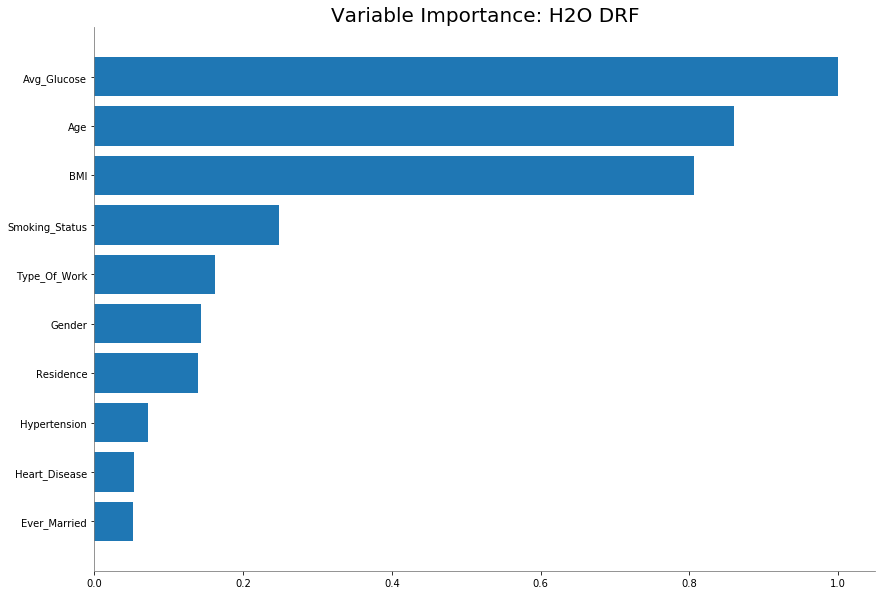

In [48]:
rf_v2.varimp_plot()

In [49]:
# help(H2ORandomForestEstimator)

In [52]:
#perf = rf_v2.model_performance(train=True)  #train=True is the default, so it's not needed
#perf.plot()


In [57]:
out = rf_v2.model_performance(test)
out


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.019677642093128667
RMSE: 0.14027701911977125
MAE: 0.036563713496832746
RMSLE: 0.10094241705423208
Mean Residual Deviance: 0.019677642093128667


In [58]:
fpr = out.fprs
tpr = out.tprs

AttributeError: type object 'H2ORegressionModelMetrics' has no attribute 'fprs'

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='blue', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.show()

AttributeError: type object 'H2ORegressionModelMetrics' has no attribute 'fprs'